In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

In [3]:
tf.random.set_seed(42) # 랜덤셋 고정

In [108]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [105]:
x_data = np.array([[h]], dtype=np.float32)
x_data.shape

(1, 1, 4)

In [106]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
x_data.shape

(1, 5, 4)

In [20]:
hidden_size = 2
cell = layers.SimpleRNNCell(hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True)
outputs, state = rnn(x_data)

print('x_data\n{} \t\t\tshape : {}'.format(x_data,x_data.shape))
print('outputs\n{} \t\tshape : {}'.format(outputs,outputs.shape))
print('state\n{} \t\tshape : {}'.format(state,state.shape))

<x_data>
[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] 			shape : (1, 5, 4)
<outputs>
[[[ 0.33639172 -0.64969087]
  [ 0.00450858  0.53531694]
  [ 0.8894953  -0.67754936]
  [ 0.4349966   0.32322162]
  [ 0.8242993   0.69675964]]] 		shape : (1, 5, 2)
<state>
[[0.8242993  0.69675964]] 		shape : (1, 2)


In [23]:
x_data = np.array([[h, e, l, l, o],[e, o, l, l, l],[l, l, e, e, l]],dtype=np.float32)
x_data

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [27]:
hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, state = rnn(x_data)

print('x_data\n{} \t\t\tshape : {}'.format(x_data,x_data.shape))
print()
print('outputs\n{} \t\tshape : {}'.format(outputs,outputs.shape))
print()
print('state\n{} \t\tshape : {}'.format(state,state.shape))

x_data
[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]] 			shape : (3, 5, 4)

outputs
[[[ 0.5270306  -0.5239155 ]
  [ 0.66856146 -0.28161973]
  [ 0.7784079   0.18724072]
  [ 0.6162256  -0.16664386]
  [ 0.7961074  -0.0594871 ]]

 [[ 0.07702818 -0.15421602]
  [ 0.6469817   0.3594086 ]
  [ 0.46409488 -0.1571721 ]
  [ 0.6764092   0.27883214]
  [ 0.52664    -0.135844  ]]

 [[ 0.40417162  0.52115506]
  [ 0.22712572 -0.05128701]
  [ 0.24385802 -0.30292925]
  [ 0.43422854 -0.18091701]
  [ 0.67774385  0.31356192]]] 		shape : (3, 5, 2)

state
[[ 0.7961074  -0.0594871 ]
 [ 0.52664    -0.135844  ]
 [ 0.67774385  0.31356192]] 		shape : (3, 2)


In [34]:
idx2char = ['토', '마', '를', '먹', '자']

x_data = [[0, 0, 1, 2, 4, 3]] # 토 토 마 를 자 먹  # 트레인값
y_data = [[0, 1, 0, 2, 3, 4]] # 토 마 토 를 먹 자  # 라벨값

num_class = 5 # class 의 갯수
input_dim = 5 # word embedding dimension
sequence_length = 6 # 들어가는 단어 갯수
learning_rate = 0.1

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_class)
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_class)

x_one_hot, y_one_hot

(array([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0.]]], dtype=float32),
 array([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]], dtype=float32))

In [35]:
x_one_hot.shape, y_one_hot.shape

((1, 6, 5), (1, 6, 5))

In [30]:
model = tf.keras.Sequential()
cell = layers.SimpleRNNCell(units=5, input_shape=(sequence_length, input_dim))

model.add(layers.RNN(cell=cell, return_sequences=True, return_state=False,
                     input_shape=(sequence_length, input_dim)))
# TimeDistributed : 중간중간 아웃풋 값들을 확인하기 위해 사용
model.add(layers.TimeDistributed(layers.Dense(units=num_class, activation='softmax')))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_9 (RNN)                 (None, 6, 5)              55        
                                                                 
 time_distributed (TimeDistr  (None, 6, 5)             30        
 ibuted)                                                         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_one_hot, y_one_hot, epochs=10)

Epoch 1/10


2022-03-07 11:09:53.105064: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-07 11:09:53.412933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 1.5763 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 1.2720 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 29ms/step - loss: 1.0479 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.8813 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 0.7192 - accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6014 - accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 0s 26ms/step - loss: 0.5153 - accuracy: 0.8333
Epoch 8/10
1/1 [==============================] - 0s 28ms/step - loss: 0.4415 - accuracy: 0.8333
Epoch 9/10
1/1 [==============================] - 0s 27ms/step - loss: 0.3717 - accuracy: 0.8333
Epoch 10/10
1/1 [==============================] - 0s 31ms/step - loss: 0.3061 - accuracy: 1.0000


In [32]:
pred = model.predict(x_one_hot)
pred

2022-03-07 11:10:04.967963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[[6.1361134e-01, 2.8711942e-01, 8.5027903e-02, 1.1898506e-03,
         1.3051561e-02],
        [3.3859944e-01, 5.7943600e-01, 8.0008149e-02, 1.2494229e-03,
         7.0703967e-04],
        [8.7829310e-01, 8.7934859e-02, 3.0682717e-02, 6.5965514e-04,
         2.4296623e-03],
        [6.0617741e-02, 1.6071291e-01, 7.7155286e-01, 4.5281728e-03,
         2.5883929e-03],
        [1.6482474e-03, 9.5958146e-04, 4.3252720e-03, 9.8924679e-01,
         3.8201085e-03],
        [3.5554659e-02, 2.3965845e-03, 2.1280586e-03, 8.8266125e-03,
         9.5109421e-01]]], dtype=float32)

In [114]:
for word in pred:
    print(word)

[[6.1361134e-01 2.8711942e-01 8.5027903e-02 1.1898506e-03 1.3051561e-02]
 [3.3859944e-01 5.7943600e-01 8.0008149e-02 1.2494229e-03 7.0703967e-04]
 [8.7829310e-01 8.7934859e-02 3.0682717e-02 6.5965514e-04 2.4296623e-03]
 [6.0617741e-02 1.6071291e-01 7.7155286e-01 4.5281728e-03 2.5883929e-03]
 [1.6482474e-03 9.5958146e-04 4.3252720e-03 9.8924679e-01 3.8201085e-03]
 [3.5554659e-02 2.3965845e-03 2.1280586e-03 8.8266125e-03 9.5109421e-01]]


In [116]:
for word in pred:
    print(np.argmax(word,axis=1))

[0 1 0 2 3 4]


In [112]:
for word in pred:
    print(" ".join([idx2char[c] for c in np.argmax(word, axis=1)]))

토 마 토 를 먹 자


#  오후수업

In [121]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['I love my dog',
             'I love my cat',
             'You love my dog!',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index) # lower, ! 제외

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


In [132]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['I love my dog',
             'He loves my cat',
             'You love my dog!',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[5, 3, 1, 2], [6, 7, 1, 8], [4, 3, 1, 2], [9, 4, 10, 1, 2, 11, 12]]


In [133]:
from os import truncate
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
# maxlen : 결과의 차원수
# padding(post) : 단어가 추가로 없을 때, 뒤에 0추가
# truncate(post) : 단어가 추가로 있을 때, 뒤에서부터 자르기
print(padded)

[[ 5  3  1  2  0]
 [ 6  7  1  8  0]
 [ 4  3  1  2  0]
 [ 9  4 10  1  2]]


In [134]:
# out of vocabulary : 딕셔너리에 정의되지 않은 단어들을 어떻게 표시할거에요?
print("oov값 주기 전",word_index,sep='\n')
tokenizer = Tokenizer(oov_token="<oov>") 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print("oov값 준 후",word_index,sep="\n")
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
# padding : maxlen이 충족이 안됐을 때, post면 뒤에, default는 앞에 0 추가
print(padded)

oov값 주기 전
{'my': 1, 'dog': 2, 'love': 3, 'you': 4, 'i': 5, 'he': 6, 'loves': 7, 'cat': 8, 'do': 9, 'think': 10, 'is': 11, 'amazing': 12}
oov값 준 후
{'<oov>': 1, 'my': 2, 'dog': 3, 'love': 4, 'you': 5, 'i': 6, 'he': 7, 'loves': 8, 'cat': 9, 'do': 10, 'think': 11, 'is': 12, 'amazing': 13}
[[6, 4, 2, 3], [7, 8, 2, 9], [5, 4, 2, 3], [10, 5, 11, 2, 3, 12, 13]]
[[ 6  4  2  3  0]
 [ 7  8  2  9  0]
 [ 5  4  2  3  0]
 [10  5 11  2  3]]


In [135]:
test_data=['I really love my dog','My dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq, maxlen=5, padding='post', truncating='post')
print(padded)

[[6 1 4 2 3]
 [2 3 8 2 1]]


# 오후 두번째

In [136]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [137]:
train_data, test_data = imdb['train'], imdb['test']

In [138]:
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

for sentence, label in train_data:
    train_sentences.append(sentence.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

for sentence, label in test_data:
    test_sentences.append(sentence.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

In [139]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [140]:
len(train_sentences), len(train_sentences[0])

(25000, 709)

In [141]:
len(test_sentences), len(test_sentences[0])

(25000, 939)

In [142]:
vocab_size = 10000 # ex) '토마토를 먹자'일 땐 5개
embedding_dim = 16 # ex) 10000개 차원을 16개의 차원으로 축소해서 vector로 변환
max_length = 120 # 문장 짜르기 (최대 120개까지)
trunc_type = 'post' # 뒤에서 짜르세요
oov_tok = '<oov>' # 딕셔너리에 없는 단어는 요렇게 해주세요

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [160]:
word_index = tokenizer.word_index # 딕셔너리로 반환
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
# maxlen : 모든 문장을 maxlen크기로

In [161]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [162]:
padded[0]

array([   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
          1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
        154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
         58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
         12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
       1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
       2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
        117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
          9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
        242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
       1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10],
      dtype=int32)

In [146]:
index_word = {value : key for (key, value) in word_index.items()}

In [153]:
# 인덱스화 된 것을 문자로 변환
def decode_review(text):
    return " ".join([index_word.get(i, '?') for i in text])
# get을 통해서 0번째 인덱스로 된 것들을 다 ?로 변환

In [154]:
print(decode_review(padded[0]), train_sentences[0], sep="\n\n")

? ? ? this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most p

In [87]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) # Embedding: input 값의 차원을 ouput 값의 차원으로 축소 # cnn에서 rand에 속함
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [88]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padd = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [93]:
num_epochs = 10
hist = model.fit(padded, train_labels, validation_data=(test_padd, test_labels), epochs=num_epochs)

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2676 - accuracy: 0.8920 - val_loss: 0.3775 - val_accuracy: 0.8324
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2299 - accuracy: 0.9111 - val_loss: 0.3905 - val_accuracy: 0.8324
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2030 - accuracy: 0.9256 - val_loss: 0.4199 - val_accuracy: 0.8266
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1826 - accuracy: 0.9339 - val_loss: 0.4535 - val_accuracy: 0.8220
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1636 - accuracy: 0.9429 - val_loss: 0.4919 - val_accuracy: 0.8181
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1487 - accuracy: 0.9485 - val_loss: 0.5479 - val_accuracy: 0.8034
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1352 - accuracy: 0.9555 - val_loss: 0.5750 - val_accuracy:

In [94]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
weights.shape

(10000, 16)

In [99]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

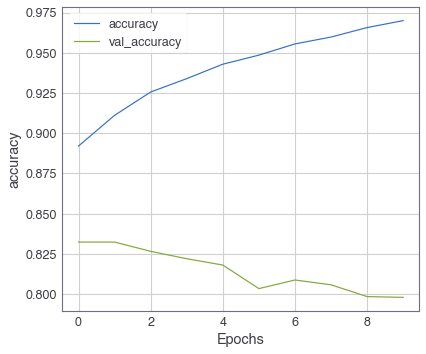

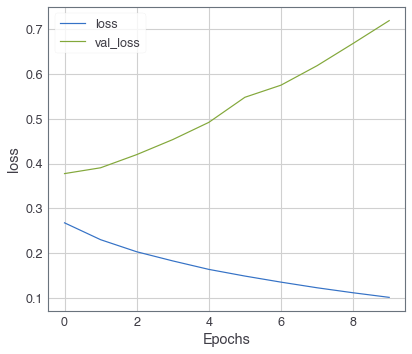

In [100]:
plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

#  오늘도..잘 끝났다...ㅎㅎ